# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import math as mth
import timeit

In [6]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [ ]:
A = integer_spiral(7)
print(A)

In [102]:
def integer_spiral_numpy(n):
    #TODO naimplementujte viz zadání
    A = np.zeros((n + 2, n + 2))
    pos_row = n//2 + 1 
    pos_col = n//2 + 1
    #pocatecni_cislo = 1
    index = 0
    prirustek = 0
    krok = 1
    for i in range(mth.ceil(n/2)):
        
        B = np.arange(1,((n+1)**2)+1)
        A[pos_row:pos_row+prirustek+1, pos_col] = B[index:index+krok]
        index+=krok
        A[pos_row+prirustek, pos_col+1:pos_col+prirustek+2] = B[index:index+krok]
        index+=krok
   
        if(i == (mth.ceil(n/2))- 1):
            break
        A[pos_row+prirustek-1:pos_row-2:-1, pos_col+prirustek+1] = B[index:index+krok]
        index+=krok
        A[pos_row-1, pos_col+prirustek:pos_col-1:-1] = B[index:index+krok]
        index+=krok
        
        
        krok += 2
        prirustek += 2
        pos_row -= 1
        pos_col -= 1
    
    return A[1:-1, 1:-1] 
    
    

In [108]:

n = 7
print(integer_spiral(n))
print(integer_spiral_numpy(n))

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]
[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [109]:
n = 101
%timeit integer_spiral(n)
%timeit integer_spiral_numpy(n)

4.82 ms ± 312 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
299 μs ± 16.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [110]:
n = 1001
%timeit integer_spiral(n)
%timeit integer_spiral_numpy(n)

642 ms ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.59 s ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [111]:
n = 10001
%timeit integer_spiral(n)
%timeit integer_spiral_numpy(n)

53.2 s ± 1.14 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


KeyboardInterrupt: 

## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
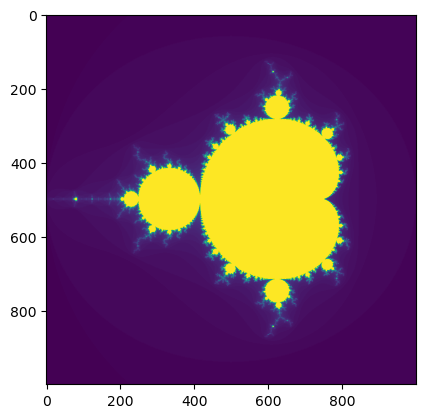

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)'
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [139]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    x_realne,y_imaginarni = np.meshgrid(x,y)
    matice_komplexnich_cisel = x_realne + y_imaginarni * 1j
    divergence_matrix = np.zeros((n,n), dtype=int)
    matice_z = np.zeros((n,n), dtype=complex)
    for i in range(k):
        matice_z = matice_z**2 + matice_komplexnich_cisel
        
        divergence_matrix = np.where((np.absolute(matice_z)>= 2) & (divergence_matrix == 0), i, divergence_matrix)
    
    divergence_matrix = np.where(divergence_matrix == 0, k, divergence_matrix)
    
    return divergence_matrix
    
    

C:\Users\ciesl\AppData\Local\Temp\ipykernel_32388\2822182888.py:9: RuntimeWarning: overflow encountered in square
  matice_z = matice_z**2 + matice_komplexnich_cisel
C:\Users\ciesl\AppData\Local\Temp\ipykernel_32388\2822182888.py:9: RuntimeWarning: invalid value encountered in square
  matice_z = matice_z**2 + matice_komplexnich_cisel


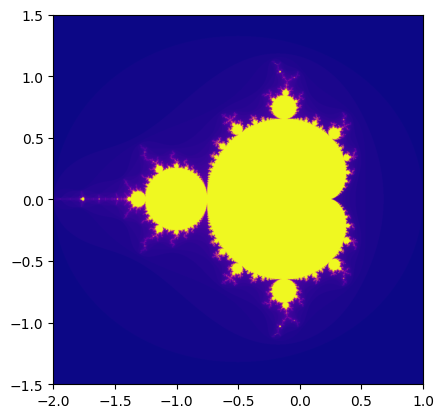

In [143]:
n = 1000
k = 100
divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix, cmap='plasma', extent=(-2, 1, -1.5, 1.5))

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 